In [41]:
import sys
print(sys.version)

3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]


# MNIST simple neural network
### This file takes care of the training and statistical data production for this model
https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Imports

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from torchvision datasets.
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from torchvision datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
print(type(train_data))
print(type(test_data))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torchvision.datasets.mnist.MNIST'>


In [7]:
print(train_data)
print(test_data)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
import matplotlib.pyplot as plt

In [12]:
type(test_data[1][0])

torch.Tensor

In [34]:
test_data[0][0][0].dim()

2

In [40]:
test_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [44]:
test_data[0][0].size(2)
imageData = test_data[0][0]
imageData = imageData.squeeze(0)

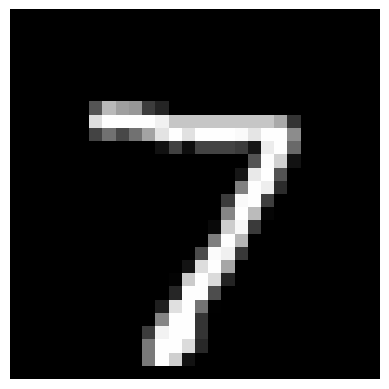

In [45]:
plt.imshow(imageData, cmap="gray")
plt.axis("off")  # Optional: Hides axes
plt.show()

In [44]:
batch_size = 256

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([256, 1, 28, 28])
Shape of y: torch.Size([256]) torch.int64


Keep device test!

In [45]:
# Get cpu, gpu or mps device for training. Excellent little code snippet that checks what form of acceleration is available. Code from https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


redefine test model

In [46]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)


model with simple shapes: 4 ,2 2, 9  

Change loss and optimizer usage

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [48]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [49]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [50]:
epochs = 15
for t in range(epochs):
    print(f"Epoch count {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304393  [  256/60000]
loss: 2.303602  [25856/60000]
loss: 2.301876  [51456/60000]
Test Error: 
 Accuracy: 9.1%, Avg loss: 2.301483 

Epoch 2
-------------------------------
loss: 2.301940  [  256/60000]
loss: 2.301307  [25856/60000]
loss: 2.299776  [51456/60000]
Test Error: 
 Accuracy: 11.0%, Avg loss: 2.299260 

Epoch 3
-------------------------------
loss: 2.299493  [  256/60000]
loss: 2.298994  [25856/60000]
loss: 2.297639  [51456/60000]
Test Error: 
 Accuracy: 13.5%, Avg loss: 2.297008 

Epoch 4
-------------------------------
loss: 2.297025  [  256/60000]
loss: 2.296634  [25856/60000]
loss: 2.295445  [51456/60000]
Test Error: 
 Accuracy: 17.3%, Avg loss: 2.294705 

Epoch 5
-------------------------------
loss: 2.294522  [  256/60000]
loss: 2.294210  [25856/60000]
loss: 2.293172  [51456/60000]
Test Error: 
 Accuracy: 21.9%, Avg loss: 2.292327 

Epoch 6
-------------------------------
loss: 2.291959  [  256/60000]
loss: 2.291703  [2585

## Store data about training and evaluations

## Model evaluations tests:

In [51]:
#Singel value test 
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = pred[0].argmax(0), y
    print(f'Predicted: "{predicted}", Actual: "{y}"')

Predicted: "7", Actual: "7"


In [52]:
listOfFails = []
for i in range(len(test_data)):
    x, y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
        x = x.to(device)
        pred = model(x)
        predicted, actual = pred[0].argmax(0), y
        if (predicted != actual):
            listOfFails.append([i, predicted, y])
        #print(f'ImageNr: "{i+1}" Predicted: "{predicted}", Actual: "{y}"')
        if (predicted == 5): 
            print(f'ImageNr: "{i+1}" Predicted: "{predicted}", Actual: "{y}"')

In [35]:
listOfFails # This list enables me to examine what type of images the networks strugles with

[[1, tensor(0), 2],
 [6, tensor(9), 4],
 [8, tensor(0), 5],
 [11, tensor(0), 6],
 [15, tensor(0), 5],
 [19, tensor(9), 4],
 [23, tensor(3), 5],
 [24, tensor(9), 4],
 [26, tensor(9), 7],
 [33, tensor(0), 4],
 [38, tensor(3), 2],
 [42, tensor(9), 4],
 [45, tensor(3), 5],
 [46, tensor(3), 1],
 [48, tensor(9), 4],
 [52, tensor(0), 5],
 [53, tensor(3), 5],
 [54, tensor(0), 6],
 [59, tensor(7), 5],
 [61, tensor(0), 8],
 [63, tensor(2), 3],
 [64, tensor(9), 7],
 [65, tensor(9), 4],
 [66, tensor(0), 6],
 [72, tensor(0), 2],
 [73, tensor(8), 9],
 [77, tensor(7), 2],
 [80, tensor(9), 7],
 [83, tensor(9), 7],
 [96, tensor(9), 1],
 [97, tensor(3), 7],
 [98, tensor(0), 6],
 [102, tensor(0), 5],
 [106, tensor(0), 2],
 [109, tensor(9), 4],
 [110, tensor(3), 8],
 [111, tensor(1), 7],
 [115, tensor(9), 4],
 [116, tensor(9), 4],
 [119, tensor(0), 2],
 [120, tensor(3), 5],
 [121, tensor(6), 4],
 [122, tensor(9), 7],
 [124, tensor(9), 7],
 [127, tensor(9), 5],
 [129, tensor(3), 5],
 [132, tensor(0), 5],
 

In [53]:
#failed matrix: Gives a more general understanding of where the model fails. What numbers does it pick wrong and for witch number!
failedMatrix = [[0 for x in range(10)] for x in range(10)] 
for elem in listOfFails:
    failedMatrix[elem[1].int()][elem[2]] += 1
for row in failedMatrix:
    print(row)

[0, 0, 21, 6, 1, 91, 43, 2, 38, 13]
[0, 0, 2, 7, 10, 22, 14, 12, 12, 7]
[36, 101, 0, 24, 97, 117, 116, 81, 209, 63]
[89, 59, 232, 0, 64, 506, 33, 44, 507, 109]
[0, 0, 1, 1, 0, 12, 3, 15, 4, 229]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[41, 11, 64, 7, 134, 79, 0, 5, 43, 53]
[1, 6, 12, 23, 97, 62, 1, 0, 34, 473]
[0, 0, 0, 1, 0, 2, 0, 1, 0, 1]
[0, 0, 0, 0, 9, 1, 0, 1, 0, 0]
